# Zach McLean
## Open Lab 8
## Dr Phillips
## CSCI 4850

A.I. Disclaimer: All work for this assignment was completed by myself and entirely without the use of artificial intelligence tools such as ChatGPT, MS Copilot, other LLMs, etc.

# ResNet50 on CIFAR10 – Experimental Results

This notebook compares the training history and test performance of four experiments on CIFAR10 using ResNet50 under different conditions:
- **Augmented & Pretrained**
- **Nonaugmented & Pretrained**
- **Augmented & Nonpretrained**
- **Nonaugmented & Nonpretrained**

The following plots display:
- The evolution of validation loss over 50 epochs.
- The evolution of validation accuracy over 50 epochs.
- A barplot comparing the test accuracies for the four experimental configurations.

---

## 1. Load Metrics and Plot Learning Curves

### Import Libraries and Load CSV Data


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load training/validation metrics CSV files
metrics_aug_pre = pd.read_csv("resnet50-metrics-augmented-pretrained.csv")
metrics_nonaug_pre = pd.read_csv("resnet50-metrics-nonaugmented-pretrained.csv")
metrics_aug_nonpre = pd.read_csv("resnet50-metrics-augmented-nonpretrained.csv")
metrics_nonaug_nonpre = pd.read_csv("resnet50-metrics-nonaugmented-nonpretrained.csv")

### Plot Validation Loss

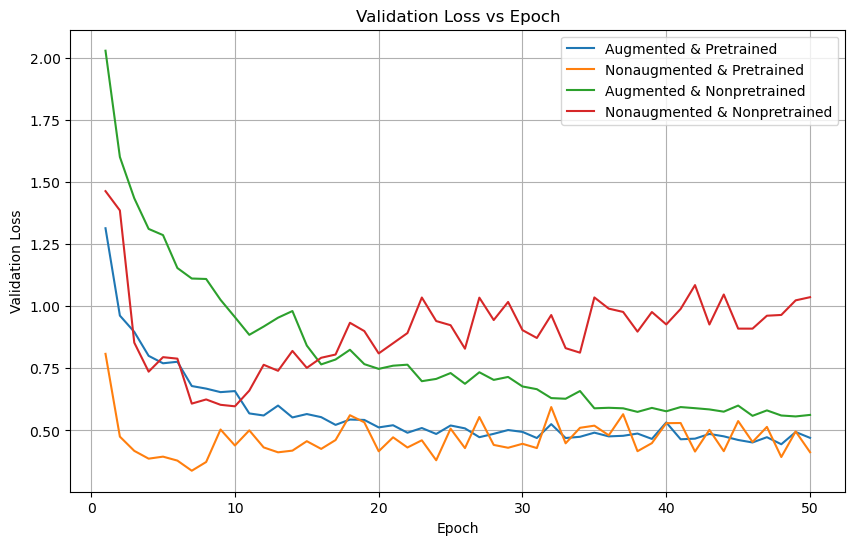

In [2]:
plt.figure(figsize=(10,6))
plt.plot(metrics_aug_pre['epoch'], metrics_aug_pre['val_loss'], label='Augmented & Pretrained')
plt.plot(metrics_nonaug_pre['epoch'], metrics_nonaug_pre['val_loss'], label='Nonaugmented & Pretrained')
plt.plot(metrics_aug_nonpre['epoch'], metrics_aug_nonpre['val_loss'], label='Augmented & Nonpretrained')
plt.plot(metrics_nonaug_nonpre['epoch'], metrics_nonaug_nonpre['val_loss'], label='Nonaugmented & Nonpretrained')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss vs Epoch')
plt.legend()
plt.grid(True)
plt.show()


### Plot Validation Accuracy

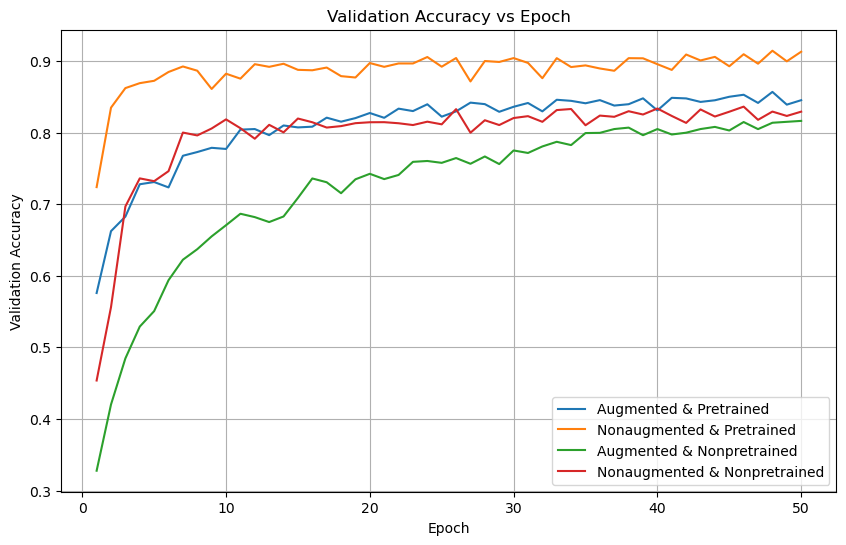

In [3]:
plt.figure(figsize=(10,6))
plt.plot(metrics_aug_pre['epoch'], metrics_aug_pre['val_acc'], label='Augmented & Pretrained')
plt.plot(metrics_nonaug_pre['epoch'], metrics_nonaug_pre['val_acc'], label='Nonaugmented & Pretrained')
plt.plot(metrics_aug_nonpre['epoch'], metrics_aug_nonpre['val_acc'], label='Augmented & Nonpretrained')
plt.plot(metrics_nonaug_nonpre['epoch'], metrics_nonaug_nonpre['val_acc'], label='Nonaugmented & Nonpretrained')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs Epoch')
plt.legend()
plt.grid(True)
plt.show()


# 2. Compare Test Performance

### Load Test Results and Create a Bar Plot

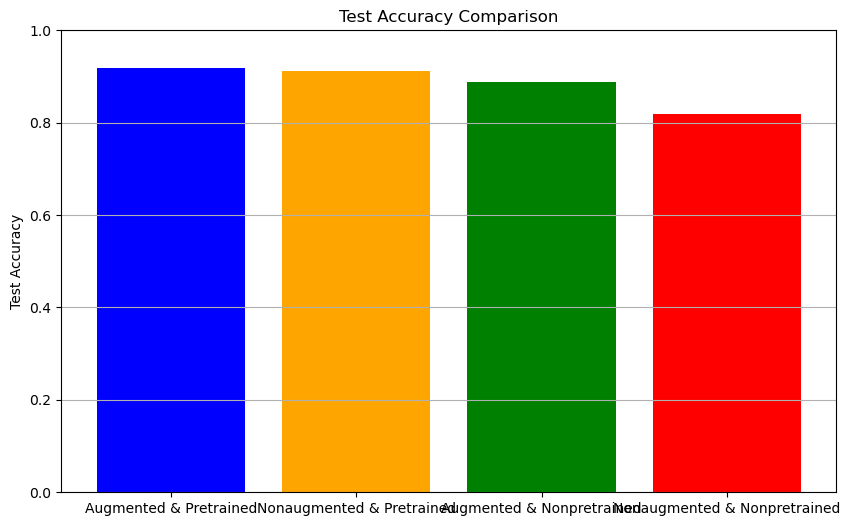

In [4]:
# Load test results CSV files
test_aug_pre = pd.read_csv("resnet50-test-augmented-pretrained.csv")
test_nonaug_pre = pd.read_csv("resnet50-test-nonaugmented-pretrained.csv")
test_aug_nonpre = pd.read_csv("resnet50-test-augmented-nonpretrained.csv")
test_nonaug_nonpre = pd.read_csv("resnet50-test-nonaugmented-nonpretrained.csv")

test_acc = [
    test_aug_pre['test_acc'][0],
    test_nonaug_pre['test_acc'][0],
    test_aug_nonpre['test_acc'][0],
    test_nonaug_nonpre['test_acc'][0]
]
labels = ['Augmented & Pretrained', 'Nonaugmented & Pretrained', 'Augmented & Nonpretrained', 'Nonaugmented & Nonpretrained']

plt.figure(figsize=(10,6))
plt.bar(labels, test_acc, color=['blue', 'orange', 'green', 'red'])
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy Comparison')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


# 3 Results
###  Learning Curves Analysis

#### Validation Loss and Accuracy:
- The curves should show a decreasing trend in loss and an increasing (or stabilizing) trend in accuracy as training proceeds. Pretrained models are expected to start with a better baseline (lower loss/higher accuracy) because they already have learned features from ImageNet. Data augmentation generally helps improve generalization by reducing overfitting.

#### Configuration Differences:

#### Augmented & Pretrained: Likely to show the best performance due to both robust feature initialization and regularization from augmentation.

#### Nonaugmented & Pretrained: May start strong but can be prone to overfitting in the absence of augmentation.

#### Augmented & Nonpretrained: The regularization effect of augmentation is present, but without transfer learning the model might learn slower.

#### Nonaugmented & Nonpretrained: Expected to perform the worst, as it lacks both pretrained features and the benefits of data augmentation.

### Test Performance Analysis
- The bar plot provides a clear comparison of test accuracies. Pretrained networks should yield higher test accuracy, with data augmentation further improving the results. These differences confirm the value of transfer learning and regularization in enhancing model generalization.